# Clean Data of the results of experiment 5
- This program is used to export the txt file to dataframe in python. The txt is captured from the experiment#5 in Github. File location : https://github.com/tawanmeow/privacy-sdn-logfile/tree/main/Experiment5

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

## Input filename that you want to clean data

In [2]:
# this pandas version dose not support directlly loading the file from url.
url = 'https://github.com/tawanmeow/privacy-sdn-logfile/tree/main/Experiment5'
filename = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment5/Questionmark/test5_1000cm.txt"
filename_csv = "/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment5/Questionmark/test5_1000cm.csv"


## Functions for getting the throughput data from dataframe df

In [3]:
def getDataframeThru(df,start_row,measurement_interval,header_range):
    '''
    This functions will import the data from txt file and return the dataframe without the header of txt file.
    Input: 
        measurement_interval = 30 (sec) : 
        header_range = 10 lines
        start_row = 0 
    Return: 
        df1t : dataframe of througput and jitter
    '''
    
    df1 = df.drop(labels=range(start_row, header_range), axis=0)
    df1t = df1.drop(labels=range(measurement_interval, len(df)), axis=0)
    
    return df1t

In [4]:
def getDatafromTxT(filename, headerrange):
    """
    Get dataframe from txt file:
    filename : xxx.txt
    headerrange : number of lines that needed to be removed. 
    
    return : df : datafame type
    """
    h = headerrange + 1
    skip_1 = list(range(0,h, 1))
    df = pd.read_csv(filename,
        skiprows=skip_1,
        header=None,
        delimiter=' ',
        skipinitialspace=True,
        error_bad_lines=False)
    return df
    

## Run functions: 

In [5]:
headerrange = 5
df = getDatafromTxT(filename, headerrange)
print(df.head)

<bound method NDFrame.head of     0    1            2         3        4       5           6          7   \
0    [   5]    0.00-1.00       sec     2.12  MBytes        17.8  Mbits/sec   
1    [   5]    1.00-2.00       sec     2.12  MBytes        17.8  Mbits/sec   
2    [   5]    2.00-3.00       sec     3.10  MBytes        26.0  Mbits/sec   
3    [   5]    3.00-4.00       sec     3.41  MBytes        28.6  Mbits/sec   
4    [   5]    4.00-5.00       sec     3.35  MBytes        28.1  Mbits/sec   
..  ..  ...          ...       ...      ...     ...         ...        ...   
498  [   5]  28.00-29.00       sec     3.61  MBytes        30.3  Mbits/sec   
499  [   5]  29.00-30.00       sec     3.61  MBytes        30.3  Mbits/sec   
500  [   5]  30.00-30.05       sec      158  KBytes        26.9  Mbits/sec   
501  [  ID]     Interval  Transfer  Bitrate  Jitter  Lost/Total  Datagrams   
502  [   5]   0.00-30.05       sec      105  MBytes        29.3  Mbits/sec   

        8    9        10    11   

b'Skipping line 38: expected 13 fields, saw 25\nSkipping line 78: expected 13 fields, saw 25\nSkipping line 118: expected 13 fields, saw 25\nSkipping line 158: expected 13 fields, saw 25\nSkipping line 198: expected 13 fields, saw 25\nSkipping line 238: expected 13 fields, saw 25\nSkipping line 278: expected 13 fields, saw 25\nSkipping line 318: expected 13 fields, saw 25\nSkipping line 359: expected 13 fields, saw 25\nSkipping line 399: expected 13 fields, saw 25\nSkipping line 440: expected 13 fields, saw 25\nSkipping line 480: expected 13 fields, saw 25\nSkipping line 520: expected 13 fields, saw 25\n'


In [6]:
## Find start row index of itteration
def getStartEndID(df,start_data,end_data):
    """
    to clean dataframe and return the data with new header
    Input: 
        df : datafram without header of txt file 
    Output
        strat_indices_list : start indices list
    """
    # creating and passing series to new column
    df["Start"]= df[2].str.find(start_data)
    df["End"]= df[2].str.find(end_data)

    index = df.index
    strat_indices = index[df["Start"]==0.0]
    strat_indices_list = strat_indices.tolist()
    end_indices = index[df["End"]==0.0]
    end_indices_list = end_indices.tolist()
    
    
    return strat_indices_list, end_indices_list
    

In [7]:
def getCleanData(df,strat_indices_list,end_indices_list):
    """
    
    """
    df_all = df.drop(labels=range(1, len(df)), axis=0) # create new df
    start_row = 0
    c = 0
    for i in strat_indices_list: 
        
        h = i
        print('h =',h)
        m = end_indices_list[c]
        print('m =', m)
        df1 = getDataframeThru(df,start_row,m,h)
        print('df1 = ', df1)
        result = pd.concat([df_all,df1])
        df_all = result
        c = c + 1
        if i == 0:
            
            df_all = df_all.drop(labels=0, axis=0)
        
        
    return df_all

## Run functions

In [8]:
start_data = '0.00-1.00'
end_data = '29.00-30.00'
strat_indices_list, end_indices_list = getStartEndID(df,start_data,end_data)
print('strat_indices_list: ', strat_indices_list)
print('end_indices_list: ', end_indices_list)
df_all = getCleanData(df,strat_indices_list,end_indices_list)

strat_indices_list:  [0, 39, 78, 117, 156, 195, 234, 273, 313, 352, 392, 431, 470]
end_indices_list:  [29, 68, 107, 146, 185, 224, 263, 302, 342, 381, 421, 460, 499]
h = 0
m = 29
df1 =      0   1            2    3     4       5     6          7      8   9      10  \
0   [  5]    0.00-1.00  sec  2.12  MBytes  17.8  Mbits/sec  1.815  ms  0/1537   
1   [  5]    1.00-2.00  sec  2.12  MBytes  17.8  Mbits/sec  1.061  ms  0/1535   
2   [  5]    2.00-3.00  sec  3.10  MBytes  26.0  Mbits/sec  0.651  ms  0/2248   
3   [  5]    3.00-4.00  sec  3.41  MBytes  28.6  Mbits/sec  0.656  ms  0/2466   
4   [  5]    4.00-5.00  sec  3.35  MBytes  28.1  Mbits/sec  1.321  ms  0/2427   
5   [  5]    5.00-6.00  sec  2.95  MBytes  24.8  Mbits/sec  0.910  ms  0/2138   
6   [  5]    6.00-7.00  sec  3.12  MBytes  26.2  Mbits/sec  0.687  ms  0/2262   
7   [  5]    7.00-8.00  sec  3.53  MBytes  29.6  Mbits/sec  0.665  ms  0/2559   
8   [  5]    8.00-9.00  sec  3.47  MBytes  29.1  Mbits/sec  0.711  ms  0/2510   
9   

498  0/2612  (0%)  NaN   -1.0 -1.0  


print(df_all)

In [9]:
# Replace new columns header

df_all_new = df_all.drop(df_all.columns[[0,1,3, 5,7,9,11]], axis=1)  


In [10]:
df_all_new.rename({2 :'Interval', 4 : 'Transfer', 6 :'Bitrate', 8 :'Jitter', 10 :'Lost/Total Datagrams'}, axis=1, inplace=True)


In [11]:
print(df_all_new)

        Interval Transfer Bitrate Jitter Lost/Total Datagrams   12  Start  End
1      1.00-2.00     2.12    17.8  1.061               0/1535  NaN   -1.0 -1.0
2      2.00-3.00     3.10    26.0  0.651               0/2248  NaN   -1.0 -1.0
3      3.00-4.00     3.41    28.6  0.656               0/2466  NaN   -1.0 -1.0
4      4.00-5.00     3.35    28.1  1.321               0/2427  NaN   -1.0 -1.0
5      5.00-6.00     2.95    24.8  0.910               0/2138  NaN   -1.0 -1.0
..           ...      ...     ...    ...                  ...  ...    ...  ...
494  24.00-25.00     3.49    29.3  0.576               0/2530  NaN   -1.0 -1.0
495  25.00-26.00     3.64    30.5  0.684               0/2634  NaN   -1.0 -1.0
496  26.00-27.00     3.54    29.7  0.584               0/2565  NaN   -1.0 -1.0
497  27.00-28.00     3.59    30.1  0.676               0/2600  NaN   -1.0 -1.0
498  28.00-29.00     3.61    30.3  0.763               0/2612  NaN   -1.0 -1.0

[376 rows x 8 columns]


In [12]:
# export dataframe to csv 
df_all_new.to_csv(filename_csv)

# Plot dataframe

In [13]:
print(df_all_new['Bitrate'])

1      17.8
2      26.0
3      28.6
4      28.1
5      24.8
       ... 
494    29.3
495    30.5
496    29.7
497    30.1
498    30.3
Name: Bitrate, Length: 376, dtype: object


In [14]:
df_all_new['Bitrate'] = df_all_new['Bitrate'].astype(float) 

In [15]:
print(len(df_all_new.index))
time = np.array(range(len(df_all_new.index)))
print(time)

df_all_new['Time'] = time
print(df_all_new.head)
df_all_new['Time'] = df_all_new['Time'].astype(int) 


376
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

## Throughput

In [16]:
# avergae throughput 
sumThroughput = df_all_new['Bitrate'].sum()
avgSumThroughput = sumThroughput/len(time)
print('avg Throughput :', avgSumThroughput)
print('var Throughput :', df_all_new['Bitrate'].var())

avg Throughput : 28.959574468085105
var Throughput : 9.29788141843972


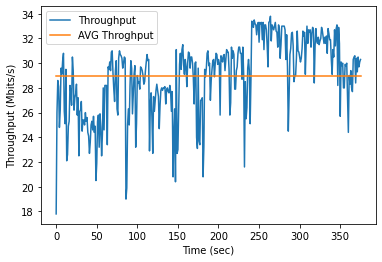

In [17]:
# Throughput 
ax = plt.gca()
df_all_new.plot(kind='line', x='Time', y='Bitrate', ax =ax)
plt.legend(["Throughput"]);
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Throughput (Mbits/s)")
avg_thr = np.ones(len(df_all_new.index),dtype = float)*avgSumThroughput
s = pd.DataFrame(avg_thr, columns = ['AVG Throghput'])
s.plot(ax=ax)
plt.show()

## Jitter

In [18]:
df_all_new['Jitter'] = df_all_new['Jitter'].astype(float) 

In [19]:
# avergae jitter 
sumThroughput = df_all_new['Jitter'].sum()
avgSumThroughput = sumThroughput/len(time)
print('avg Jitter :', avgSumThroughput)
print('var Jitter :', df_all_new['Jitter'].var())

avg Jitter : 0.6845079787234043
var Jitter : 0.04803970660283689


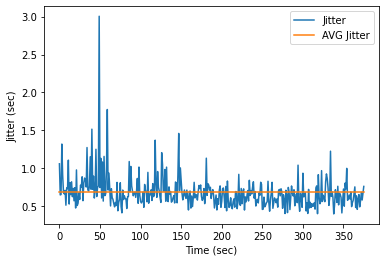

In [20]:
avg_thr = np.ones(len(df_all_new.index),dtype = float)*avgSumThroughput
J = pd.DataFrame(avg_thr, columns = ['AVG Jitter'])

ax2 = plt.gca()
df_all_new.plot(kind='line', x='Time', y='Jitter', ax =ax2)
plt.legend(["Jitter"]);
ax2.set_xlabel("Time (sec)")
ax2.set_ylabel("Jitter (sec)")
J.plot(ax=ax2)
plt.show()